In [1]:
# Import libraries
import numpy as np
import pandas as pd
import os
print(os.getcwd())


/home/zceeysa/Documents/ELEC0134/ELEC0134/B2


In [2]:
# Only run this once
os.chdir('..')

In [3]:
base_dir = '/home/zceeysa/Documents/ELEC0134/ELEC0134'

os.chdir(base_dir)

In [4]:
# Converting csv into dataframe using read_csv(label_path)
train_cartoon_df = pd.read_csv('Dataset/dataset_AMLS_22-23/cartoon_set/labels.csv', sep='\t', engine='python')
train_df = train_cartoon_df[['file_name', 'eye_color']]
print(train_df.head())


# Convert the face shape column to class 1-5
train_df.loc[:,'eye_color'] += 1
print(train_df.head())

# Convert face shape column type from int64 to str for data generator
train_df["eye_color"] = train_df["eye_color"].astype(str)

  file_name  eye_color
0     0.png          1
1     1.png          2
2     2.png          2
3     3.png          2
4     4.png          0
  file_name  eye_color
0     0.png          2
1     1.png          3
2     2.png          3
3     3.png          3
4     4.png          1


/home/zceeysa/Desktop/ENTER/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/tmp/ipykernel_2590731/41347787.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["eye_color"] = train_df["eye_color"].astype(str)


In [5]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [6]:
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd

# Read in the excel sheet with the labels
train_labels_df = pd.read_csv('Dataset/dataset_AMLS_22-23/cartoon_set/labels.csv')

# Define the data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Define the data loaders
batch_size = 32

# split the data into training and validation sets
training_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

train_gen = train_datagen.flow_from_dataframe(dataframe=training_df,
                                                    directory='Dataset/dataset_AMLS_22-23/cartoon_set/img',
                                                    x_col='file_name',
                                                    y_col='eye_color',
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    shuffle=True,
                                                    class_mode='categorical')

val_gen = val_datagen.flow_from_dataframe(dataframe=val_df,
                                                directory='Dataset/dataset_AMLS_22-23/cartoon_set/img',
                                                x_col='file_name',
                                                y_col='eye_color',
                                                target_size=(224, 224),
                                                batch_size=32,
                                                shuffle=True,
                                                class_mode='categorical')

2023-01-20 17:06:15.234151: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-20 17:06:15.381542: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /lib64:/lib:/usr/local/lib:/usr/local/lib64:/usr/lib64:/usr/lib:/apps/cuda/lib64:/apps/cuda/lib
2023-01-20 17:06:15.381567: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-20 17:06:17.204794: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dy

Found 8000 validated image filenames belonging to 5 classes.
Found 2000 validated image filenames belonging to 5 classes.


In [7]:
# Converting csv into dataframe using read_csv(label_path)
test_cartoon_df = pd.read_csv('Dataset/dataset_AMLS_22-23_test/cartoon_set_test/labels.csv', sep='\t', engine='python')
test_df = test_cartoon_df[['file_name', 'eye_color']]
print(test_df.head())

# Convert the face shape column to class 1-5
test_df.loc[:,'eye_color'] += 1
print(test_df.head())

# Convert face shape column type from int64 to str for data generator
test_df["eye_color"] = test_df["eye_color"].astype(str)

  file_name  eye_color
0     0.png          2
1     1.png          1
2     2.png          0
3     3.png          0
4     4.png          3
  file_name  eye_color
0     0.png          3
1     1.png          2
2     2.png          1
3     3.png          1
4     4.png          4


/home/zceeysa/Desktop/ENTER/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/tmp/ipykernel_2590731/1880917469.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["eye_color"] = test_df["eye_color"].astype(str)


In [8]:
# Create a test dataframe by reading in the labels for the test images
test_labels_df = pd.read_csv('Dataset/dataset_AMLS_22-23_test/cartoon_set_test/labels.csv')

# Create a test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

# Create the test dataloader
test_generator = test_datagen.flow_from_dataframe(dataframe=test_df,
                                                    directory='Dataset/dataset_AMLS_22-23_test/cartoon_set_test/img',
                                                    x_col='file_name',
                                                    y_col='eye_color',
                                                    target_size=(224, 224),
                                                    class_mode='categorical',
                                                    shuffle=False
                                                )


Found 2500 validated image filenames belonging to 5 classes.


In [9]:
# Use early stopping to terminate training epochs through callbacks
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

# Seek a mininum for validation loss and display the stopped epochs using verbose and adding delays
stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# Save best model using checkpoint
model_path = os.path.join('/home/zceeysa/Documents/ELEC0134/ELEC0134/B2', 'vgg16_eye.h5')
checkpoints = ModelCheckpoint(os.path.normcase(model_path), monitor='val_loss', mode='min', verbose=1, save_best_only=True)

# Define callback function in a list
callback_list = [stop, checkpoints]

In [10]:
# Import network libraries
import keras

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization

model = Sequential()

model.add(Conv2D(input_shape=(224,224,3),filters=16,kernel_size=(3,3),padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=16, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=64,activation="relu"))
model.add(Dense(units=5, activation="softmax")) 

# Display summary of the model
model.summary()

# Compile the model using ADAM (Adaptive learning rate optimization)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

2023-01-20 17:06:54.903288: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /lib64:/lib:/usr/local/lib:/usr/local/lib64:/usr/lib64:/usr/lib:/apps/cuda/lib64:/apps/cuda/lib
2023-01-20 17:06:54.903494: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /lib64:/lib:/usr/local/lib:/usr/local/lib64:/usr/lib64:/usr/lib:/apps/cuda/lib64:/apps/cuda/lib
2023-01-20 17:06:54.903620: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /lib64:/lib:/usr/local/lib:/u

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 16)      2320      
                                                                 
 batch_normalization_1 (Batc  (None, 112, 112, 16)     64        
 hNormalization)                                                 
                                                        

In [11]:
import time

In [12]:
class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

In [13]:
# Set steps per epoch for callback 
STEP_SIZE_TRAIN = train_gen.samples//train_gen.batch_size
STEP_SIZE_VALID = val_gen.samples//val_gen.batch_size
print(STEP_SIZE_TRAIN)
print(STEP_SIZE_VALID)

time_callback = TimeHistory()

history = model.fit_generator(generator=train_gen,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    epochs=100,
                    callbacks=[time_callback, callback_list],
                    validation_data=val_gen,
                    validation_steps=STEP_SIZE_VALID)

times = time_callback.times

250
62


/tmp/ipykernel_2590731/791964217.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_gen,


Epoch 1/100
250/250 [==============================] - ETA: 0s - loss: 1.2200 - accuracy: 0.5679
Epoch 00001: val_loss improved from inf to 1.88065, saving model to /home/zceeysa/Documents/ELEC0134/ELEC0134/B2/vgg16_eye.h5
250/250 [==============================] - 171s 673ms/step - loss: 1.2200 - accuracy: 0.5679 - val_loss: 1.8807 - val_accuracy: 0.2455
Epoch 2/100
250/250 [==============================] - ETA: 0s - loss: 0.4038 - accuracy: 0.8354
Epoch 00002: val_loss improved from 1.88065 to 0.74418, saving model to /home/zceeysa/Documents/ELEC0134/ELEC0134/B2/vgg16_eye.h5
250/250 [==============================] - 166s 662ms/step - loss: 0.4038 - accuracy: 0.8354 - val_loss: 0.7442 - val_accuracy: 0.6774
Epoch 3/100
250/250 [==============================] - ETA: 0s - loss: 0.3564 - accuracy: 0.8462
Epoch 00003: val_loss improved from 0.74418 to 0.36799, saving model to /home/zceeysa/Documents/ELEC0134/ELEC0134/B2/vgg16_eye.h5
250/250 [==============================] - 165s 658ms

In [29]:
import matplotlib.pyplot as plt


def plot_training_history(history,times):
    plt.figure(figsize=(14,5))
    plt.subplot(1, 3, 1)
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.plot(history.history['loss'], label='Training Loss')
    plt.title('Validation Loss vs. Number of Epochs')
    plt.xlabel('Number of Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 3, 2)
    plt.plot(times)
    plt.title('Fit time vs. Number of Epochs')
    plt.xlabel('Number of Epochs')
    plt.ylabel('Fit time')

    plt.show()



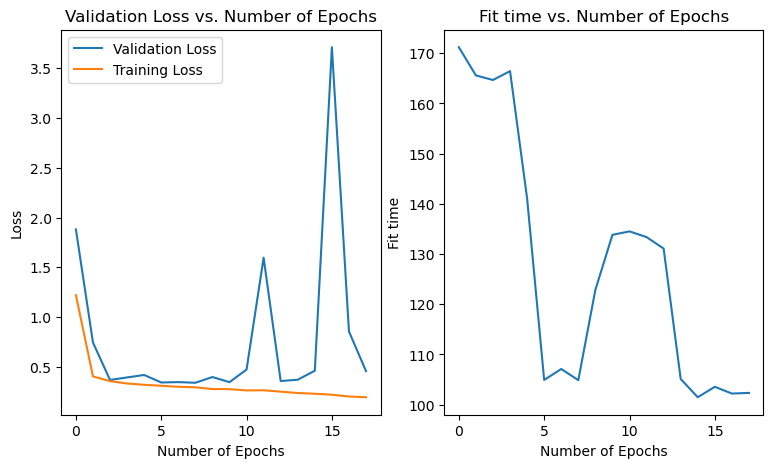

In [30]:
plot_training_history(history, times)

In [37]:
from keras.models import load_model
from keras import backend as K
from sklearn.metrics import precision_recall_fscore_support

# Load the pre-trained model
model = load_model("B2/vgg16_eye.h5")

# Compile the model (if necessary)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Set the learning phase to test
K.set_learning_phase(0)

# Generate predictions from the test data
predictions = model.predict_generator(test_generator, steps=len(test_generator))
predictions = np.argmax(predictions, axis=1)

# Convert test labels to class labels
test_labels = test_generator.labels

test_loss, test_acc = model.evaluate(test_generator)
# Calculate precision, recall, f1-score, and support
precision, recall, f1_score, support = precision_recall_fscore_support(test_labels, predictions, average='weighted')

# Print test loss, accuracy, precision, recall, f1-score, and support
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_acc)
print("Test Precision: ", precision)
print("Test Recall: ", recall)
print("Test F1-Score: ", f1_score)

/home/zceeysa/Desktop/ENTER/lib/python3.8/site-packages/keras/backend.py:451: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(
/tmp/ipykernel_2590731/3925256735.py:15: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator, steps=len(test_generator))


79/79 [==============================] - 17s 210ms/step - loss: 0.3252 - accuracy: 0.8492
Test Loss:  0.32522693276405334
Test Accuracy:  0.8492000102996826
Test Precision:  0.852667127122391
Test Recall:  0.8492
Test F1-Score:  0.8498717678578862


In [17]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


In [18]:
# Generate the predictions from your model
predictions = model.predict(test_generator)

# Convert predictions to a class index
predictions = np.argmax(predictions, axis=1)

# Convert class labels to a one-hot encoded format
y_test = np.argmax(test_generator.labels, axis=1)

# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
plt.imshow(confusion_mat, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
plt.savefig('confus_eye.png')



79/79 [==============================] - 21s 264ms/step


AxisError: axis 1 is out of bounds for array of dimension 1

In [ ]:
from sklearn.metrics import roc_auc_score

# Generate the predictions from your model
predictions = model.predict(test_generator)

# Get the true labels
y_test = test_generator.labels

# Calculate the weighted average ROC AUC score
roc_auc = roc_auc_score(y_test, predictions, average='weighted')

print("Weighted average ROC AUC:", roc_auc)
